In [1]:
import GNNExperiment

/Users/finnbowcott/opt/anaconda3/envs/gnn_env/lib/python3.10/site-packages/torch_geometric/__init__.py:4: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: dlopen(/Users/finnbowcott/opt/anaconda3/envs/gnn_env/lib/python3.10/site-packages/torch_scatter/_version_cpu.so, 0x0006): symbol not found in flat namespace '__ZN5torch3jit17parseSchemaOrNameERKNSt3__112basic_stringIcNS1_11char_traitsIcEENS1_9allocatorIcEEEEb'
  import torch_geometric.typing
/Users/finnbowcott/opt/anaconda3/envs/gnn_env/lib/python3.10/site-packages/torch_geometric/__init__.py:4: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: dlopen(/Users/finnbowcott/opt/anaconda3/envs/gnn_env/lib/python3.10/site-packages/torch_sparse/_version_cpu.so, 0x0006): tried: '/Users/finnbowcott/opt/anaconda3/envs/gnn_env/lib/python3.10/site-packages/torch_sparse/_version_cpu.so' (mach-o file, but is an incompatible architecture (have 'arm64', nee

In [2]:
# Configuration
dataset_config = {
    'num_graphs': 100,
    'num_nodes_range': (30, 50),
    'graph_type': 'erdos_renyi',  # Options: 'erdos_renyi', 'barabasi_albert', 'watts_strogatz'
    'feature_type': 'structural_role',      # Options: 'structural_role', 'homophily', 'pagerank'
    'edge_prob': 0.1,
    'seed': 42
}

model_configs = {
    'GCN': {
        'hidden_channels': 64,
        'out_channels': 1,
        'num_layers': 3,
        'dropout': 0.5
    },
    'GAT': {
        'hidden_channels': 64,
        'out_channels': 1,
        'num_layers': 3,
        'heads': 4,
        'dropout': 0.5
        },
    'GIN': {
        'hidden_channels': 64,
        'out_channels': 1,
        'num_layers': 3,
        'dropout': 0.5
        }
    }

training_config = {
    'batch_size': 32,
    'learning_rate': 0.001,
    'weight_decay': 1e-5,
    'epochs': 200,
    'patience': 20
    }

# Run experiment
experiment = GNNExperiment.GNNExperiment(
    dataset_config=dataset_config,
    model_configs=model_configs,
    training_config=training_config,
    seed=42
    )


Graph Neural Network Comparison Experiment

Device: cpu

Models: GCN, GAT, GIN

Preparing dataset


Generating 100 erdos_renyi graphs
Feature type: structural_role
Node range: (30, 50)
Edge probability: 0.1


Generating graphs: 100%|██████████| 100/100 [00:00<00:00, 205.96it/s]


 Successfully generated 100/100 graphs
   Total attempts: 100
   Success rate: 100.0%

Sample graph statistics:
   Nodes: 36
   Edges: 248
   Features shape: torch.Size([36, 3])
   Feature range: [0.100, 1.000]
   Target range: [0.000, 1.000]
   Task: Predict betweenness centrality from local features

Dataset split:
  Train: 70 graphs
  Val:   15 graphs
  Test:  15 graphs

Training GCN

Training GCN(layers=3, dropout=0.5)
Device: cpu
Parameters: 4,481
Epoch 010/200 | LR: 0.001000 | Train Loss: 0.0490 | Val Loss: 0.0424
Epoch 020/200 | LR: 0.001000 | Train Loss: 0.0430 | Val Loss: 0.0407
Epoch 030/200 | LR: 0.001000 | Train Loss: 0.0427 | Val Loss: 0.0405
Epoch 040/200 | LR: 0.001000 | Train Loss: 0.0419 | Val Loss: 0.0398
Epoch 050/200 | LR: 0.001000 | Train Loss: 0.0416 | Val Loss: 0.0395
Epoch 060/200 | LR: 0.001000 | Train Loss: 0.0403 | Val Loss: 0.0393
Epoch 070/200 | LR: 0.001000 | Train Loss: 0.0403 | Val Loss: 0.0387
Epoch 080/200 | LR: 0.001000 | Train Loss: 0.0392 | Val Loss

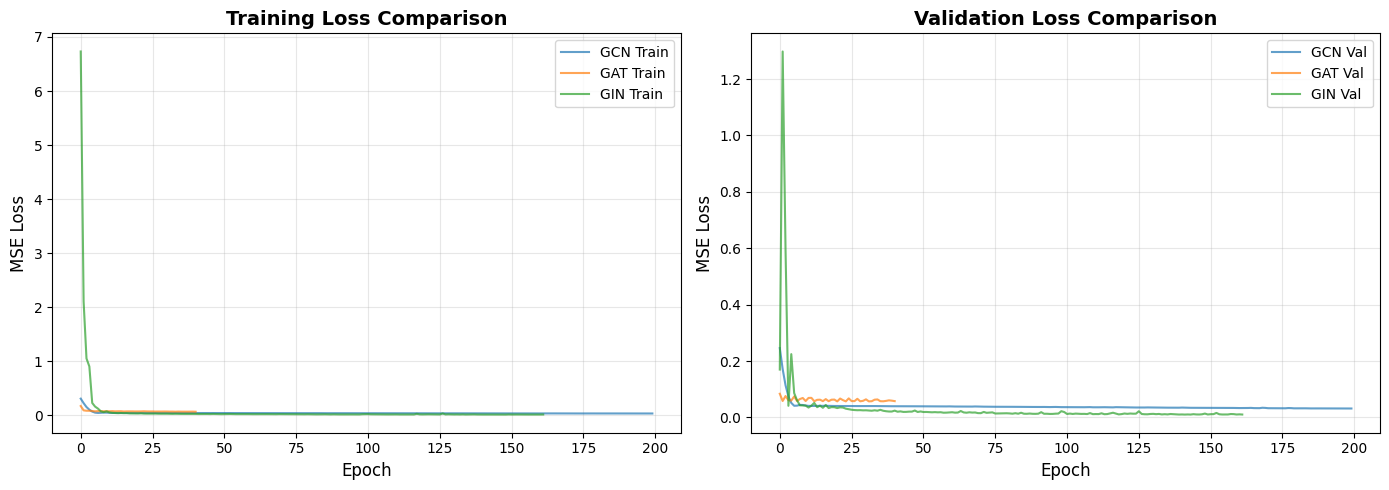

Saved comparison plot to training_comparison.png
Model Comparison Results:
Model           Train Loss      Val Loss        Test Loss      
GCN             0.0321          0.0315          0.0313         
GAT             0.0659          0.0571          0.0558         
GIN             0.0134          0.0103          0.0102         

 Best Model: GIN (Test Loss: 0.0102)


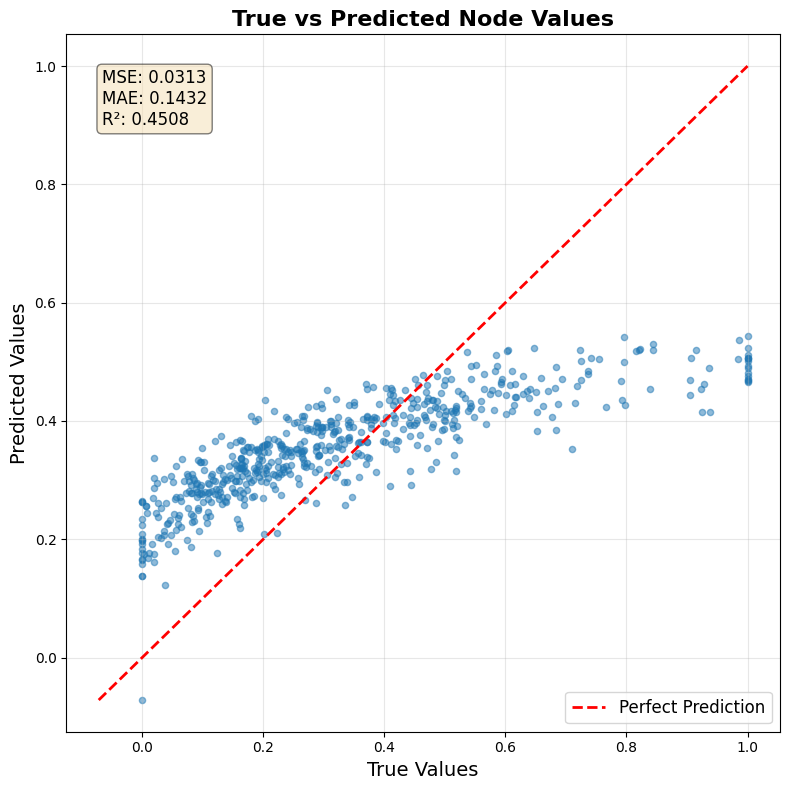

Saved scatter plot to GNN_Plots/GCN_erdos_renyi.png


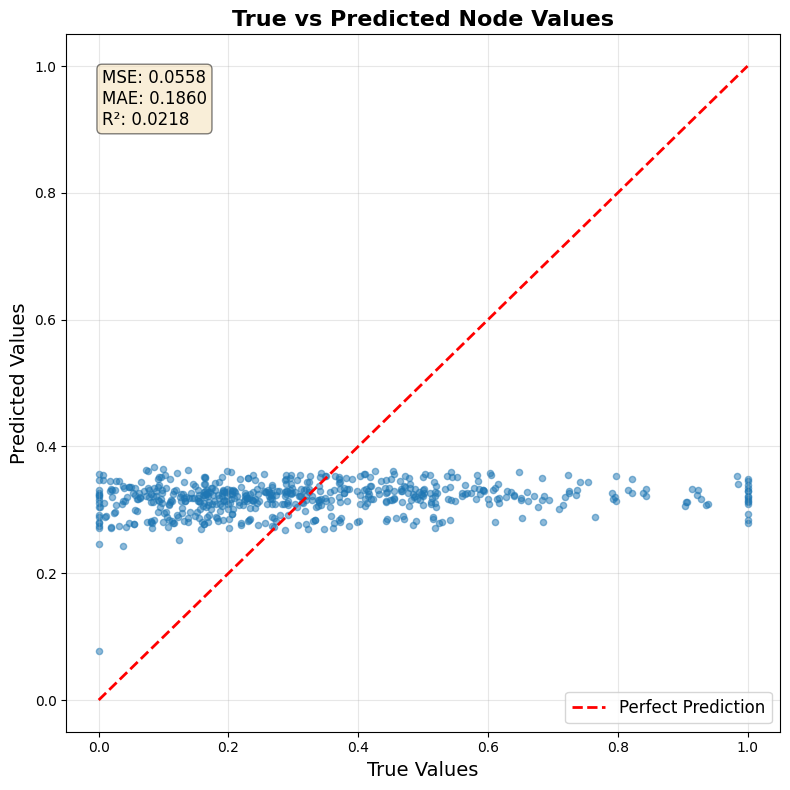

Saved scatter plot to GNN_Plots/GAT_erdos_renyi.png


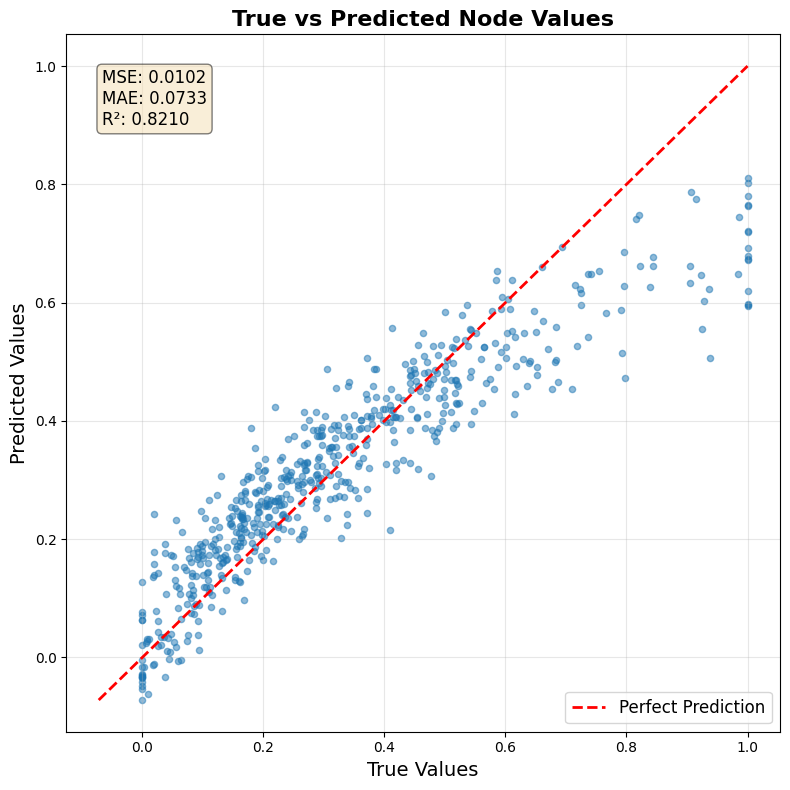

Saved scatter plot to GNN_Plots/GIN_erdos_renyi.png
Finished!


In [3]:
experiment.run()